In [1]:
from torchvision import datasets, transforms
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import sys
from pathlib import Path

In [ ]:
import os


In [ ]:
FILE = Path(os.getcwd()).resolve()
ROOT = FILE.parents[0]  # project root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH

In [2]:
from dataloader import train_loader, test_loader
from model import Net, dropout_value
from utils import train, test, train_losses, test_losses, train_acc, test_acc, show_images
#from wrong_classified import get_incorrect_preds, plot_incorrect_preds

100%|██████████| 170498071/170498071 [00:05<00:00, 29254713.75it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
(1600000, 32, 3)
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Files already downloaded and verified
Files already downloaded and verified
cuda available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params


In [3]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 48, 32, 32]             480
           Conv2d-10           [-1, 16, 32, 32]             784
depthwise_separable_conv-11           [-1, 16, 32, 32]               0
             ReLU-12           [-1, 16, 32, 32]               0
      BatchNorm2d-13           [-1, 16, 32, 32]              32
          Dropout-14       

## Sample Images


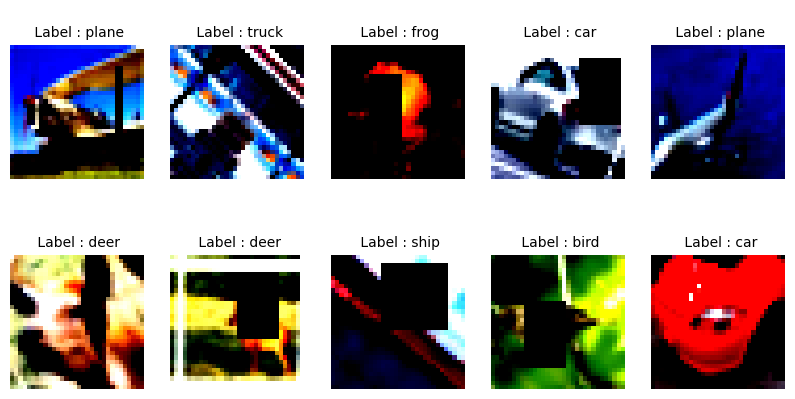

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)

# Train and Test of our model

In [5]:
EPOCHS = 30
lrs=[]
optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.04, epochs=EPOCHS, steps_per_epoch=len(train_loader))
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, scheduler, epoch)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.6712898015975952 Batch_id=195 Accuracy=31.78: 100%|██████████| 196/196 [00:22<00:00,  8.90it/s]



Test set: Average loss: 1.5540, Accuracy: 4379/10000 (43.79%)

EPOCH: 2


Loss=1.3261984586715698 Batch_id=195 Accuracy=45.35: 100%|██████████| 196/196 [00:21<00:00,  9.09it/s]



Test set: Average loss: 1.3526, Accuracy: 5272/10000 (52.72%)

EPOCH: 3


Loss=1.447079062461853 Batch_id=195 Accuracy=51.82: 100%|██████████| 196/196 [00:21<00:00,  9.05it/s]



Test set: Average loss: 1.2006, Accuracy: 5729/10000 (57.29%)

EPOCH: 4


Loss=1.365051507949829 Batch_id=195 Accuracy=55.95: 100%|██████████| 196/196 [00:21<00:00,  9.15it/s]



Test set: Average loss: 1.0489, Accuracy: 6369/10000 (63.69%)

EPOCH: 5


Loss=1.2375251054763794 Batch_id=195 Accuracy=59.68: 100%|██████████| 196/196 [00:21<00:00,  8.98it/s]



Test set: Average loss: 0.9919, Accuracy: 6509/10000 (65.09%)

EPOCH: 6


Loss=1.0001296997070312 Batch_id=195 Accuracy=62.76: 100%|██████████| 196/196 [00:21<00:00,  8.96it/s]



Test set: Average loss: 0.9202, Accuracy: 6798/10000 (67.98%)

EPOCH: 7


Loss=0.8813742399215698 Batch_id=195 Accuracy=64.99: 100%|██████████| 196/196 [00:21<00:00,  9.02it/s]



Test set: Average loss: 0.7984, Accuracy: 7191/10000 (71.91%)

EPOCH: 8


Loss=0.8732159733772278 Batch_id=195 Accuracy=66.46: 100%|██████████| 196/196 [00:21<00:00,  9.03it/s]



Test set: Average loss: 0.7457, Accuracy: 7407/10000 (74.07%)

EPOCH: 9


Loss=1.0364305973052979 Batch_id=195 Accuracy=68.52: 100%|██████████| 196/196 [00:22<00:00,  8.89it/s]



Test set: Average loss: 0.7631, Accuracy: 7329/10000 (73.29%)

EPOCH: 10


Loss=1.0014054775238037 Batch_id=195 Accuracy=69.66: 100%|██████████| 196/196 [00:21<00:00,  8.93it/s]



Test set: Average loss: 0.7595, Accuracy: 7417/10000 (74.17%)

EPOCH: 11


Loss=0.7311232686042786 Batch_id=195 Accuracy=70.81: 100%|██████████| 196/196 [00:21<00:00,  8.96it/s]



Test set: Average loss: 0.6637, Accuracy: 7695/10000 (76.95%)

EPOCH: 12


Loss=0.7307895421981812 Batch_id=195 Accuracy=71.57: 100%|██████████| 196/196 [00:22<00:00,  8.86it/s]



Test set: Average loss: 0.6332, Accuracy: 7888/10000 (78.88%)

EPOCH: 13


Loss=0.7737460136413574 Batch_id=195 Accuracy=73.09: 100%|██████████| 196/196 [00:22<00:00,  8.88it/s]



Test set: Average loss: 0.6294, Accuracy: 7796/10000 (77.96%)

EPOCH: 14


Loss=0.8368628621101379 Batch_id=195 Accuracy=73.46: 100%|██████████| 196/196 [00:22<00:00,  8.88it/s]



Test set: Average loss: 0.5988, Accuracy: 7926/10000 (79.26%)

EPOCH: 15


Loss=0.7724828720092773 Batch_id=195 Accuracy=74.41: 100%|██████████| 196/196 [00:21<00:00,  8.94it/s]



Test set: Average loss: 0.6012, Accuracy: 7973/10000 (79.73%)

EPOCH: 16


Loss=0.6681076884269714 Batch_id=195 Accuracy=75.14: 100%|██████████| 196/196 [00:22<00:00,  8.79it/s]



Test set: Average loss: 0.5868, Accuracy: 7992/10000 (79.92%)

EPOCH: 17


Loss=0.7175850868225098 Batch_id=195 Accuracy=75.57: 100%|██████████| 196/196 [00:22<00:00,  8.82it/s]



Test set: Average loss: 0.5482, Accuracy: 8121/10000 (81.21%)

EPOCH: 18


Loss=0.5974436402320862 Batch_id=195 Accuracy=76.30: 100%|██████████| 196/196 [00:21<00:00,  8.94it/s]



Test set: Average loss: 0.5211, Accuracy: 8227/10000 (82.27%)

EPOCH: 19


Loss=0.8318464159965515 Batch_id=195 Accuracy=76.93: 100%|██████████| 196/196 [00:22<00:00,  8.77it/s]



Test set: Average loss: 0.5116, Accuracy: 8272/10000 (82.72%)

EPOCH: 20


Loss=0.6842214465141296 Batch_id=195 Accuracy=77.22: 100%|██████████| 196/196 [00:22<00:00,  8.85it/s]



Test set: Average loss: 0.4987, Accuracy: 8300/10000 (83.00%)

EPOCH: 21


Loss=0.6259266138076782 Batch_id=195 Accuracy=77.87: 100%|██████████| 196/196 [00:22<00:00,  8.87it/s]



Test set: Average loss: 0.4846, Accuracy: 8352/10000 (83.52%)

EPOCH: 22


Loss=0.742732048034668 Batch_id=195 Accuracy=78.70: 100%|██████████| 196/196 [00:21<00:00,  8.93it/s]



Test set: Average loss: 0.4655, Accuracy: 8414/10000 (84.14%)

EPOCH: 23


Loss=0.4389391541481018 Batch_id=195 Accuracy=78.98: 100%|██████████| 196/196 [00:22<00:00,  8.79it/s]



Test set: Average loss: 0.4654, Accuracy: 8451/10000 (84.51%)

EPOCH: 24


Loss=0.6571553945541382 Batch_id=195 Accuracy=79.64: 100%|██████████| 196/196 [00:22<00:00,  8.84it/s]



Test set: Average loss: 0.4441, Accuracy: 8551/10000 (85.51%)

EPOCH: 25


Loss=0.5596280694007874 Batch_id=195 Accuracy=80.17: 100%|██████████| 196/196 [00:22<00:00,  8.88it/s]



Test set: Average loss: 0.4393, Accuracy: 8502/10000 (85.02%)

EPOCH: 26


Loss=0.7417784929275513 Batch_id=195 Accuracy=80.79: 100%|██████████| 196/196 [00:21<00:00,  8.97it/s]



Test set: Average loss: 0.4221, Accuracy: 8565/10000 (85.65%)

EPOCH: 27


Loss=0.25833478569984436 Batch_id=195 Accuracy=81.60: 100%|██████████| 196/196 [00:22<00:00,  8.77it/s]



Test set: Average loss: 0.4161, Accuracy: 8582/10000 (85.82%)

EPOCH: 28


Loss=0.5617063045501709 Batch_id=195 Accuracy=82.18: 100%|██████████| 196/196 [00:22<00:00,  8.81it/s]



Test set: Average loss: 0.4110, Accuracy: 8613/10000 (86.13%)

EPOCH: 29


Loss=0.7054406404495239 Batch_id=195 Accuracy=82.26: 100%|██████████| 196/196 [00:22<00:00,  8.88it/s]



Test set: Average loss: 0.4070, Accuracy: 8598/10000 (85.98%)

EPOCH: 30


Loss=0.45076149702072144 Batch_id=195 Accuracy=82.03: 100%|██████████| 196/196 [00:21<00:00,  8.92it/s]



Test set: Average loss: 0.4078, Accuracy: 8607/10000 (86.07%)



In [6]:
train_losses1 = [t.cpu().item() for t in train_losses]

In [7]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

NameError: ignored

In [ ]:
wrong_prediction = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction.append((images[j], pred[j].item(), labels[j].item()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

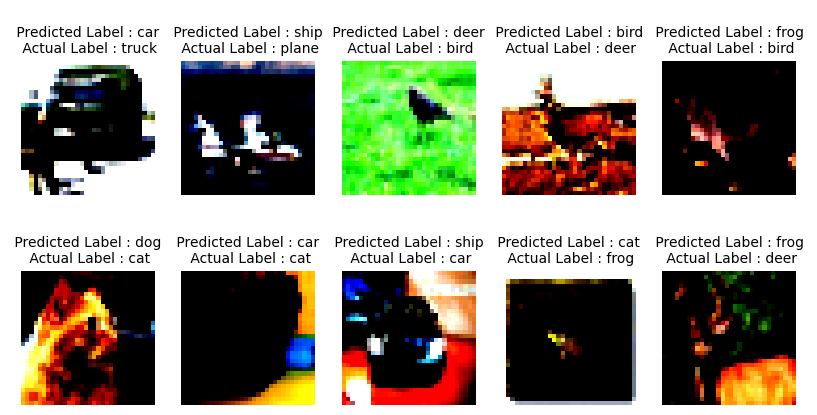

In [ ]:
display_incorrect_images(wrong_prediction, n=10 )

# #